### **Análise Exploratória de Dados (EDA)**  

Features:

**Gender**: Gênero do indivíduo.  
**Age**: Idade.  
**Height**: Altura em metros.  
**Weight**: Peso em quilogramas.  
**family_history**: Histórico familiar de excesso de peso.  
**FAVC**: Frequência de consumo de alimentos altamente calóricos.  
**FCVC**: Frequência de consumo de vegetais nas refeições.  
**NCP**: Número de refeições principais diárias.  
**CAEC**: Consumo de alimentos entre as refeições.  
**SMOKE**: Status de fumante.  
**CH2O**: Consumo diário de água.  
**SCC**: Monitoramento diário de calorias.  
**FAF**: Frequência de atividade física.  
**TER**: Tempo de uso de dispositivos tecnológicos.  
**CALC**: Frequência de consumo de álcool.  
**MTRANS**: Meio de transporte utilizado.  

In [ ]:
#Importanto bibliotecas
import numpy as np #Para operações numéricas e matemáticas
import pandas as pd #Para manipulação e análise de dados
import matplotlib.pylab as plt #Para criar gráficos
import seaborn as sns #Para criar gráficos 
import xgboost as xgb #Para criar um modelo de boost ML 
from sklearn.model_selection import train_test_split # Para dividir nosso dados de treino e teste
from sklearn.preprocessing import LabelEncoder # Para transformar nossas features categoricas em numericas
from sklearn.preprocessing import OneHotEncoder #Para criar features binarias com as variáveis categóricas
from sklearn.metrics import log_loss, accuracy_score, classification_report #Metodos de avaliação do modelo
import joblib #para importar nosso modelo e usar em nossa aplicação
from sklearn.pipeline import Pipeline #Para procesualizar nossa feature engine.


In [4]:
#Carregando Data Set
df = pd.read_csv('Obesity.csv')
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
#Números de Linha e Colunas
df.shape

(2111, 17)

In [6]:
#Colunas do Data Set
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

In [7]:
#Informações de casa Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

Podemos notar que não temos dados null

In [8]:
#Descrição estatísitca do Data Set
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Aqui podemos notar algumas informações importante sobre nossos dados  

Média de idade: 24 anos  
Média de altura: 1.7m  
Média de peso: 86kg  
Idade máxima: 61 anos  
Idade mínima: 14 anos  
Altura máxima: 1.98m  
Altura mínima: 1.45m  

In [9]:
#Encontrando dados duplicados
df.duplicated().sum()

np.int64(24)

Nesse caso não vamos remover as linhas duplicadas pois elas podem ajudar nosso modelo a encontrar um padrão.

In [10]:
#Criando feature IMC
df['IMC'] = df['Weight'] / (df['Height']**2)
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,IMC
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [11]:
#Identificando features numericas e categóricas
f_cat = []
f_num = []
target = 'Obesity'

for col in df.columns.drop([target]) : 
    if df[col].dtype == 'object':
        f_cat.append(col)
    else:
        f_num.append(col)

print(f"Features categoricas são: {f_cat}")
print(f"Features numéricas são: {f_num}")


Features categoricas são: ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Features numéricas são: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'IMC']


In [12]:
#transformando variáveis categoricas em feature binaria
df = pd.get_dummies(df, columns=f_cat)
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Obesity,IMC,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,Normal_Weight,24.386526,...,False,False,False,False,True,False,False,False,True,False
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,Normal_Weight,24.238227,...,True,False,False,True,False,False,False,False,True,False
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,Normal_Weight,23.765432,...,False,False,True,False,False,False,False,False,True,False
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,Overweight_Level_I,26.851852,...,False,False,True,False,False,False,False,False,False,True
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,Overweight_Level_II,28.342381,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,Obesity_Type_III,44.901475,...,False,False,False,True,False,False,False,False,True,False
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,Obesity_Type_III,43.741923,...,False,False,False,True,False,False,False,False,True,False
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,Obesity_Type_III,43.543817,...,False,False,False,True,False,False,False,False,True,False
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,Obesity_Type_III,44.071535,...,False,False,False,True,False,False,False,False,True,False


In [14]:
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

In [30]:
#Guardando label para usar em nosso app
joblib.dump(le, 'label_encoder.joblib')


['label_encoder.joblib']

In [16]:
# Separando features (X) e target (y)
X = df.drop([target], axis=1)
y = df[target]

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify para manter a proporção das classes
print(f"\nShape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")


Shape de X_train: (1688, 32)
Shape de X_test: (423, 32)


In [17]:
# Contar o número de classes únicas
num_classes = len(y.unique())
print(f"\nNúmero de classes detectadas: {num_classes}")


Número de classes detectadas: 7


In [18]:
# Definindo os parâmetros do XGBoost
params = {
    'objective': 'multi:softprob',  # Retorna probabilidades para cada classe
    'eval_metric': 'mlogloss',      # Métrica para avaliação de classificação multiclasse (calculo de Perda Logarítmica Multiclasse)
    'num_class': num_classes,       # O número total de classes
    'n_estimators': 200,            # Número de árvores
    'learning_rate': 0.1,           # Taxa de aprendizado
    'max_depth': 5,                 # Profundidade máxima de cada árvore
    'subsample': 0.8,               # Fração de amostras para treinar cada árvore
    'colsample_bytree': 0.8,        # Fração de colunas para treinar cada árvore
    'use_label_encoder': False,     # Para evitar o warning sobre LabelEncoder
    'random_state': 42              # Para reprodutibilidade
}


# Inicializando o modelo XGBoost
model = xgb.XGBClassifier(**params)
# Treinando o modelo
model.fit(X_train, y_train)


c:\Users\anton\Documents\FIAP\Tech Challenge 4\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:15:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [20]:
features_usadas_no_treino = model.feature_names_in_
print(features_usadas_no_treino)

['Age' 'Height' 'Weight' 'FCVC' 'NCP' 'CH2O' 'FAF' 'TUE' 'IMC'
 'Gender_Female' 'Gender_Male' 'family_history_no' 'family_history_yes'
 'FAVC_no' 'FAVC_yes' 'CAEC_Always' 'CAEC_Frequently' 'CAEC_Sometimes'
 'CAEC_no' 'SMOKE_no' 'SMOKE_yes' 'SCC_no' 'SCC_yes' 'CALC_Always'
 'CALC_Frequently' 'CALC_Sometimes' 'CALC_no' 'MTRANS_Automobile'
 'MTRANS_Bike' 'MTRANS_Motorbike' 'MTRANS_Public_Transportation'
 'MTRANS_Walking']


In [ ]:
# Fazendo previsões de probabilidade no conjunto de teste
y_pred_proba = model.predict_proba(X_test)

# Fazendo previsões de classe
y_pred_class = model.predict(X_test)

In [24]:
# Log Loss
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss no conjunto de teste: {loss:.4f}")

Log Loss no conjunto de teste: 0.0306


In [25]:
# Acurácia
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

Acurácia no conjunto de teste: 0.9858



Importância das Features:


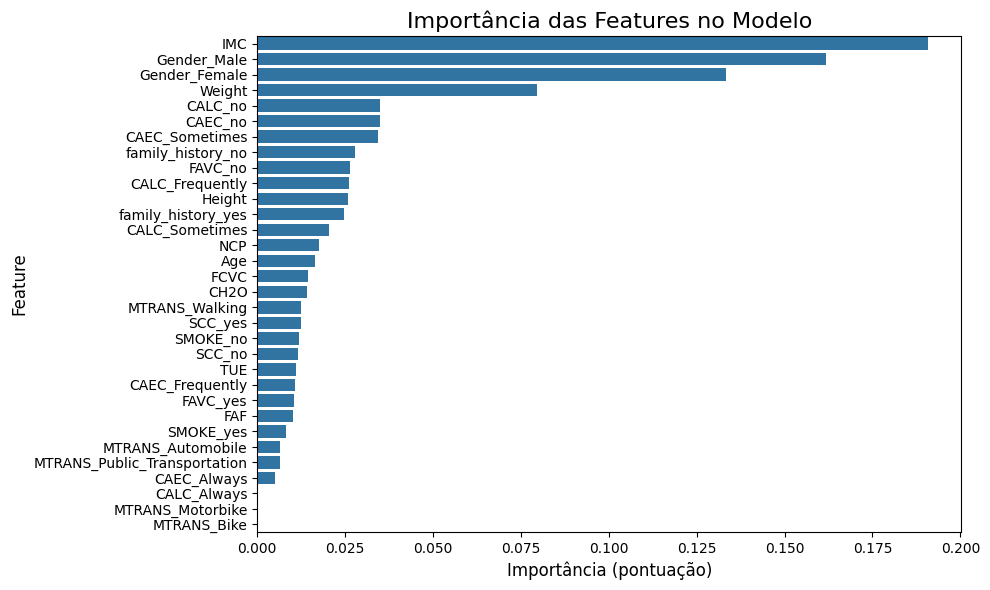

In [ ]:
#importâncias das features
print("\nImportância das Features:")
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)

# Títulos e rótulos
plt.title('Importância das Features no Modelo', fontsize=16)
plt.xlabel('Importância (pontuação)', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Melhorar o layout para evitar cortes nos rótulos
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [ ]:
 # importando modelo
joblib.dump(model, 'modelo.joblib')

['modelo.joblib']